# Covid-19 visualization

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib.dates as mdates

from datetime import date, timedelta

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
df['Total Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis= 1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


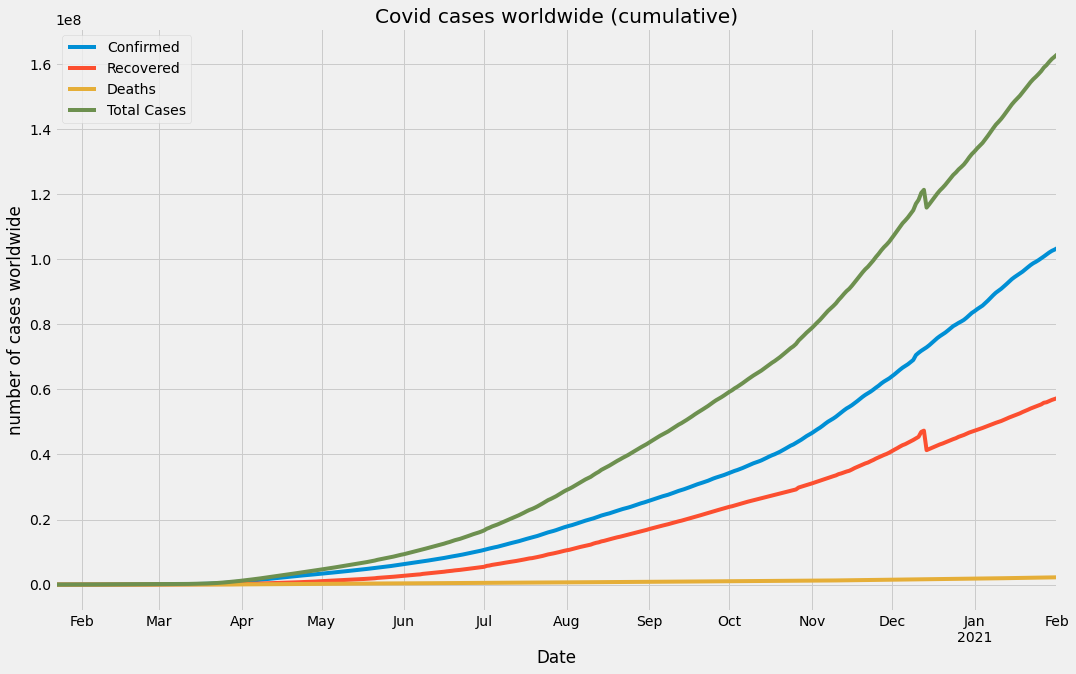

In [4]:
# total worldwide cases

world_df = df.groupby(['Date']).sum()
w = world_df.plot(figsize = (16,10))
w.set_xlabel('Date')
w.set_ylabel('number of cases worldwide')
w.title.set_text('Covid cases worldwide (cumulative)')

plt.show()

In [5]:
cn_df = df[df['Country'] == 'China'].groupby(['Date']).sum()
cn_df

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,548,28,17,593
2020-01-23,643,30,18,691
2020-01-24,920,36,26,982
2020-01-25,1406,39,42,1487
2020-01-26,2075,49,56,2180
...,...,...,...,...
2021-01-28,99746,92223,4813,196782
2021-01-29,99848,92321,4814,196983
2021-01-30,99968,92622,4815,197405


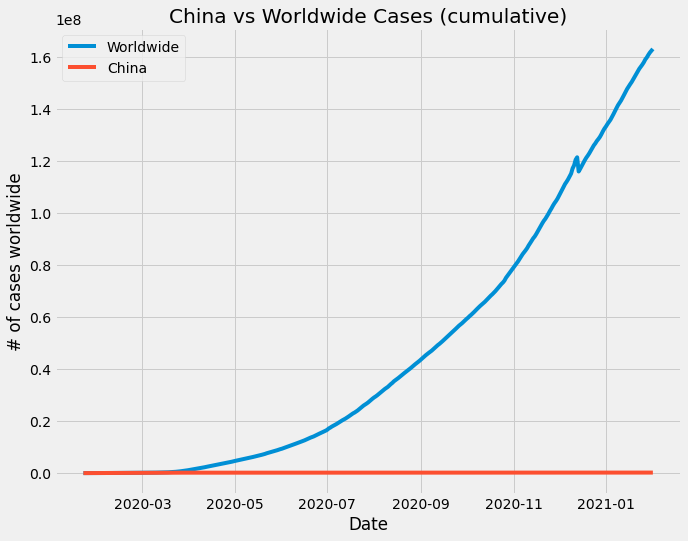

In [6]:
# plot graph of CN and worldwide cases
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot(world_df[['Total Cases']], label ='Worldwide')
ax.plot(cn_df[['Total Cases']], label ='China')

ax.set_xlabel('Date')
ax.set_ylabel('# of cases worldwide')
ax.title.set_text('China vs Worldwide Cases (cumulative)')
plt.legend()

plt.show()

In [7]:
# Daily China Cases and Deaths
cn_df = cn_df.reset_index() # remove date as index

cn_df['Daily Confirmed'] = cn_df['Confirmed'].sub(cn_df['Confirmed'].shift())
cn_df['Daily Death'] = cn_df['Deaths'].sub(cn_df['Deaths'].shift())

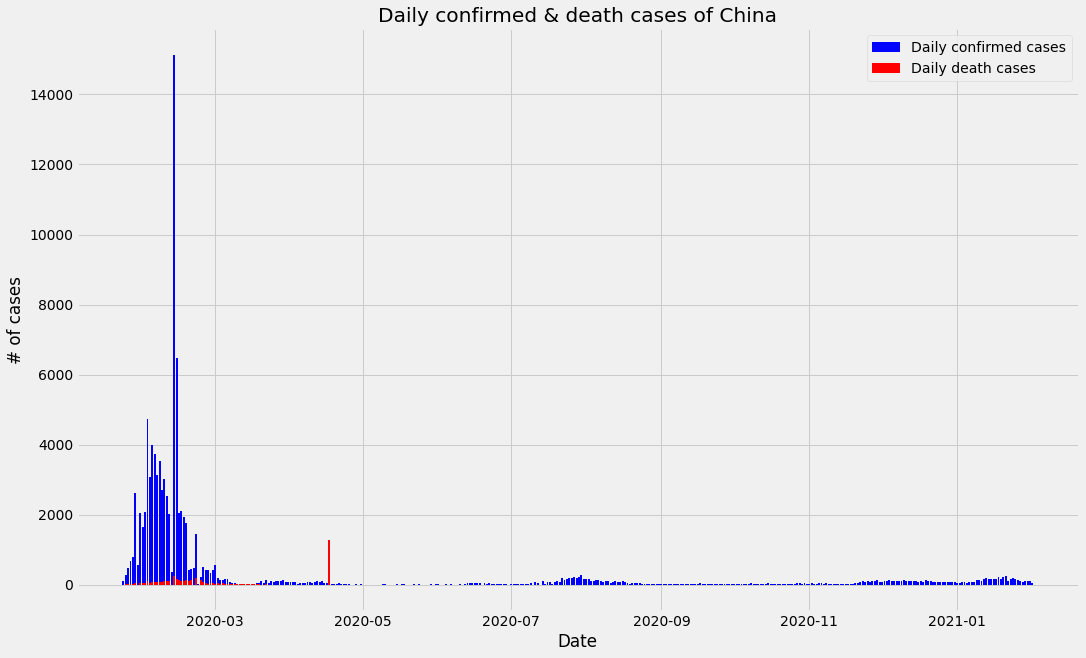

In [8]:
# Daily cases bar chart

fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(111)

ax.bar(cn_df['Date'], cn_df['Daily Confirmed'], color = 'b', label ='Daily confirmed cases')
ax.bar(cn_df['Date'], cn_df['Daily Death'], color = 'r', label ='Daily death cases')

ax.set_xlabel('Date')
ax.set_ylabel('# of cases')
ax.title.set_text('Daily confirmed & death cases of China')

plt.legend()
plt.show()

In [34]:
# define yesterday variable 
yesterday = date.today() - timedelta(days = 1)
yesterday = yesterday.strftime('%Y-%m-%d')
print(yesterday)

2021-02-01


In [30]:
today_df = df[df['Date'] == yesterday]
today_df

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
376,2021-02-01,Afghanistan,55059,47723,2404,105186
753,2021-02-01,Albania,78992,47922,1393,128307
1130,2021-02-01,Algeria,107578,73530,2894,184002
1507,2021-02-01,Andorra,9972,9206,101,19279
1884,2021-02-01,Angola,19829,18180,466,38475
...,...,...,...,...,...,...
70875,2021-02-01,Vietnam,1850,1460,35,3345
71252,2021-02-01,West Bank and Gaza,159443,149621,1840,310904
71629,2021-02-01,Yemen,2122,1426,615,4163
72006,2021-02-01,Zambia,55042,49394,780,105216


In [39]:
# top 10 countries hit by covid the day before
top_10 = today_df.sort_values(['Confirmed'],ascending = False)[:10]

# assign value to other countries
top_10.loc['Others'] = today_df.sort_values(['Confirmed'],ascending = False)[10:].sum()
top_10.loc['Others','Country'] = 'Other Countries'

In [40]:
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
67482,2021-02-01,US,26317540,0,443205,26760745
30159,2021-02-01,India,10766245,10448406,154486,21369137
9047,2021-02-01,Brazil,9229322,8202354,225099,17656775
68990,2021-02-01,United Kingdom,3846851,9735,106774,3963360
53910,2021-02-01,Russia,3825739,3282631,72456,7180826
23750,2021-02-01,France,3260308,231525,76657,3568490
61450,2021-02-01,Spain,2822805,150376,59081,3032262
32421,2021-02-01,Italy,2560957,2024523,88845,4674325
67105,2021-02-01,Turkey,2485182,2370431,26117,4881730
25258,2021-02-01,Germany,2232327,1967132,58059,4257518


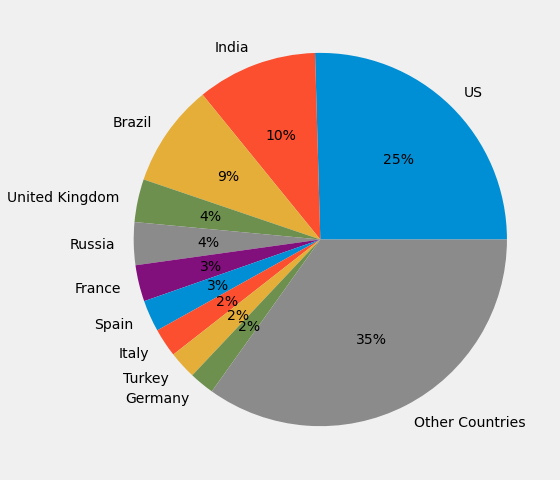

In [51]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct = '%1.0f%%')
plt.show()